In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('C:\\Users\\Vishal\\Github\\walkability-predictors\\data\\EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv')

In [43]:
df.head()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.0831
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.1466
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,106705.9281
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,481828.4303
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,687684.7752


# Description of all columns

- OBJECTID: Unique ID for each block group
- GEOID: Census block group ID
- STATEFP: State FIPS code
- COUNTYFP: County FIPS code
- TotPop: Total population
- CountHU: Total housing units
- HH: Households
- P_WrkAge: Working age population
- AutoOwn: Households with 0, 1, or 2+ vehicles
- Workers: Employed people living in the block group
- TotEmp: Total jobs
- E5|8_X: Jobs by industry classification
- D1A|B|C: Intersection density metrics
- D2A|B|C: Employment/population balance
- D3A|B: Activity density metrics
- D4A|B|C|D|E: Transit availability metrics
- D5A|B|C|D|E: Accessibility metrics
- NatWalkInd: National Walkability Index score
- Shape_Area: Land area
- Shape_Length: Perimeter

## Checking and removing Null Values

In [44]:
df.isnull().sum()

OBJECTID        0
GEOID10         1
GEOID20         0
STATEFP         0
COUNTYFP        0
               ..
D3B_Ranked      0
D4A_Ranked      0
NatWalkInd      0
Shape_Length    0
Shape_Area      0
Length: 117, dtype: int64

In [40]:
df.dropna(axis=1, inplace=True)

In [41]:
df.isnull().sum()

Column
OBJECTID        0
GEOID20         0
STATEFP         0
COUNTYFP        0
TRACTCE         0
               ..
D3B_Ranked      0
D4A_Ranked      0
NatWalkInd      0
Shape_Length    0
Shape_Area      0
Length: 106, dtype: int64

## Starting EDA to identify and affirm some stuffs

C:\Users\Vishal\AppData\Local\Temp\ipykernel_22508\4148528788.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['NatWalkInd'])


<Axes: xlabel='NatWalkInd', ylabel='Density'>

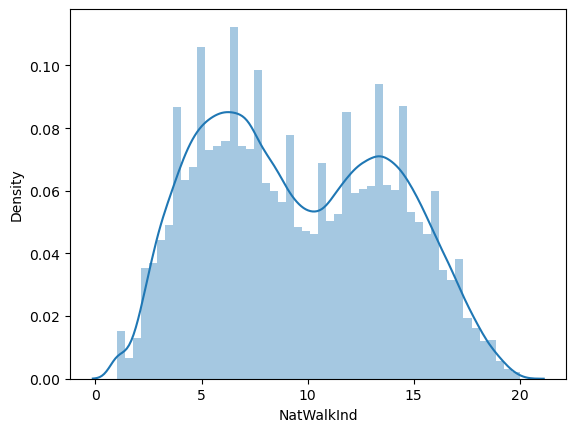

In [51]:
# distribution  
sns.distplot(df['NatWalkInd'])

In [52]:
# descriptive stats
print(df['NatWalkInd'].describe())

count    220740.000000
mean          9.541628
std           4.373952
min           1.000000
25%           5.833333
50%           9.166667
75%          13.166667
max          20.000000
Name: NatWalkInd, dtype: float64


array([[<Axes: title={'center': 'D1A'}, xlabel='STATEFP'>,
        <Axes: title={'center': 'D1B'}, xlabel='STATEFP'>],
       [<Axes: title={'center': 'D1C'}, xlabel='STATEFP'>, <Axes: >]],
      dtype=object)

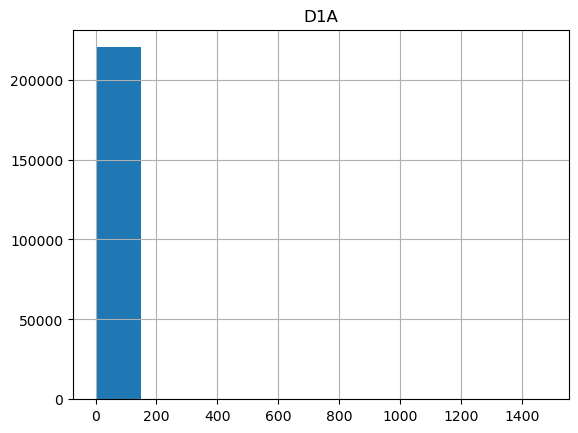

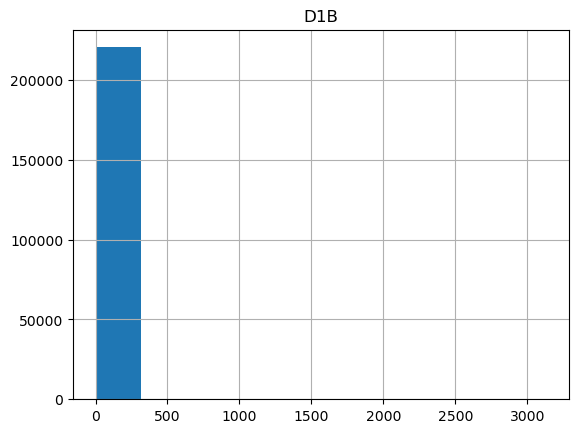

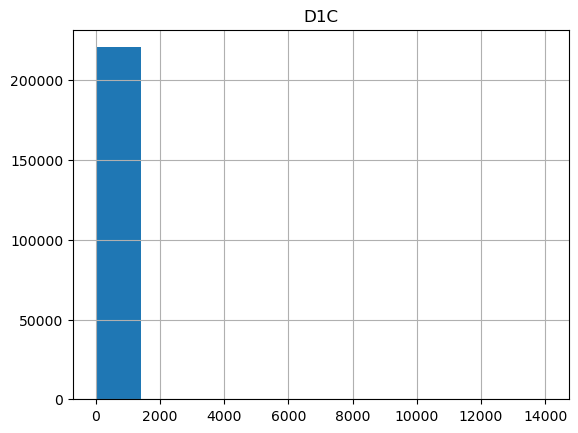

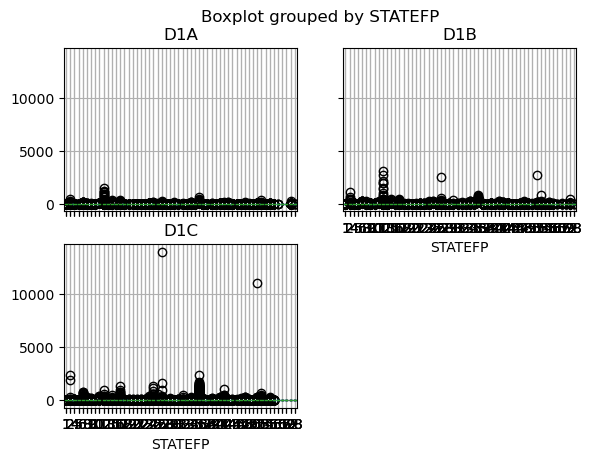

In [57]:
# histogram by D1 component
df.hist(column='D1A')
df.hist(column='D1B')
df.hist(column='D1C')

# box plots
df.boxplot(column=['D1A', 'D1B', 'D1C'], by='STATEFP')

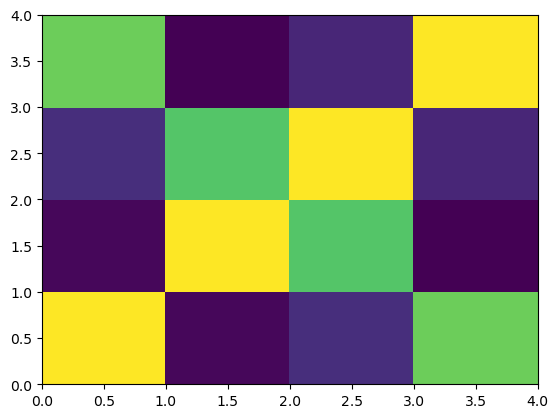

In [58]:
# heat map
plt.pcolor(df[['D4A', 'D4B025', 'D4B050', 'D4C']].corr())

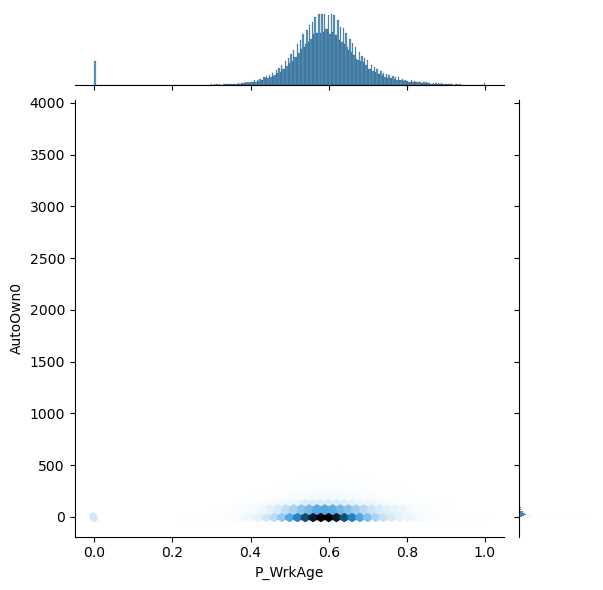

In [61]:
# Joint distribution
sns.jointplot(data=df, x="P_WrkAge", y="AutoOwn0", kind="hex")